# Problem set 2: Machine Learning 2024.
## Alumnos: Ara Francisco, Corradi Valentin, Di Placido Pedro.

In [1]:
import numpy as np
import pandas as pd

## General Instructions

El principal objetivo es construir un modelo que prediga la pobreza de los hogares. Un hogar es clasificado según la siguiente función indicadora:

$$
poor = I(Inc < Pl)
$$

Donde I indica si los ingresos de la familia están por debajo de cierto umbral.

Entonces, podemos seguir 2 caminos para hacer esta clasificación:

1 - Tomarlo como un problema de clasificación, donde se prediga 0 si no es pobre y 1 si lo es

2 - Predecir el ingreso, y luego fijarse si esta por debajo o por encima del umbral de pobreza.




## Introduction 



In [2]:
import zipfile

zip_path = "mlunlp-2024-ps-2.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Listar todos los archivos dentro del ZIP
    print(zip_ref.namelist())

['mlunlp-2024-ps-2/', '__MACOSX/._mlunlp-2024-ps-2', 'mlunlp-2024-ps-2/train_hogares.csv', '__MACOSX/mlunlp-2024-ps-2/._train_hogares.csv', 'mlunlp-2024-ps-2/ddi-documentation-spanish-608.pdf', '__MACOSX/mlunlp-2024-ps-2/._ddi-documentation-spanish-608.pdf', 'mlunlp-2024-ps-2/test_personas.csv', '__MACOSX/mlunlp-2024-ps-2/._test_personas.csv', 'mlunlp-2024-ps-2/train_personas.csv', '__MACOSX/mlunlp-2024-ps-2/._train_personas.csv', 'mlunlp-2024-ps-2/test_hogares.csv', '__MACOSX/mlunlp-2024-ps-2/._test_hogares.csv', 'mlunlp-2024-ps-2/sample_submission.csv', '__MACOSX/mlunlp-2024-ps-2/._sample_submission.csv']


In [ ]:
# import zipfile
import pandas as pd

# Ruta al archivo ZIP
zip_path = "mlunlp-2024-ps-2.zip"

# Leer archivos directamente desde el ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Cargar los datos usando las rutas correctas
    with zip_ref.open('mlunlp-2024-ps-2/train_hogares.csv') as train_hogares_file:
        train_hogares = pd.read_csv(train_hogares_file)
    with zip_ref.open('mlunlp-2024-ps-2/train_personas.csv') as train_personas_file:
        train_personas = pd.read_csv(train_personas_file)
    with zip_ref.open('mlunlp-2024-ps-2/test_hogares.csv') as test_hogares_file:
        test_hogares = pd.read_csv(test_hogares_file)
    with zip_ref.open('mlunlp-2024-ps-2/test_personas.csv') as test_personas_file:
        test_personas = pd.read_csv(test_personas_file)
    with zip_ref.open('mlunlp-2024-ps-2/sample_submission.csv') as sample_submission_file:
        sample_submission = pd.read_csv(sample_submission_file)

# Inspeccionar los datos
print("Datos de train_hogares:")
print(train_hogares.head())
print("Datos de train_personas:")
print(train_personas.head())


In [ ]:
# Matcheamos lo individual con el hogar. previamente le agregamos los sufijos _p o _h para saber su base original.

# # Personas
# train_personas = train_personas.rename(columns=lambda col: f"{col}_p" if col != "id" else col)
# train_hogares = train_hogares.rename(columns=lambda col: f"{col}_h" if col != "id" else col)
# train_all = train_personas.merge(train_hogares, on="id", how="inner")  

# #Hogares
# test_personas = test_personas.rename(columns=lambda col: f"{col}_p" if col != "id" else col)
# test_hogares = test_hogares.rename(columns=lambda col: f"{col}_h" if col != "id" else col)
# test_all = test_personas.merge(test_hogares, on="id", how="inner")

# print(f'Dimensión train_all: {train_all.shape}, Dimensión test_all: {test_all.shape}')

In [ ]:
print(train_hogares.shape)
print(train_personas.shape)
print(test_hogares.shape)
print(test_personas.shape)

Vemos que la dimensión de los df difiere. La muestra de testeo no tiene las variables relacionadas al ingreso o el indicador de pobreza/indigencia. Esto no debiera afectarnos ya que es la variable que buscamos predecir. Recordemos que un metodo a utilizar es categórico, donde en base a los predictores se clasifica directamente en pobre o no pobre, y el otro es "indirecto", donde primero se predice el ingreso y en base a eso se hace luego la clasificación.

In [ ]:
#print(train_hogares.columns)
#print(test_hogares.columns)

print(f'Las variables que difieren en los hogares son: \n{set(train_hogares.columns) - set(test_hogares.columns)}')

#print(train_personas.columns)
#print(test_personas.columns)

print(f'Las variables que difieren en las personas son: \n {set(train_personas.columns) - set(test_personas.columns)}')

In [ ]:
# print(train_hogares.columns)
print(F'test per: {train_hogares.columns}')

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

Para el caso de las variables que ya están en la base de hogares, se pueden considerar como
interesantes las siguientes: 

Dominio: hay que codificarla primero. Te recoge el efecto fijo de la región

p5010 El hacinamiento puede ser importante.

p5090 si es vivienda propia

p5130 cuanto piensa que hubiera pagado de alquiler? te puede recoger no solo un proxy del valor de la casa sino que los hogares con menores recursos van a percibir menores valores y viceversa

Nper: numero de personas, existe correlación negativa entre tamaño del hogar e ingreso

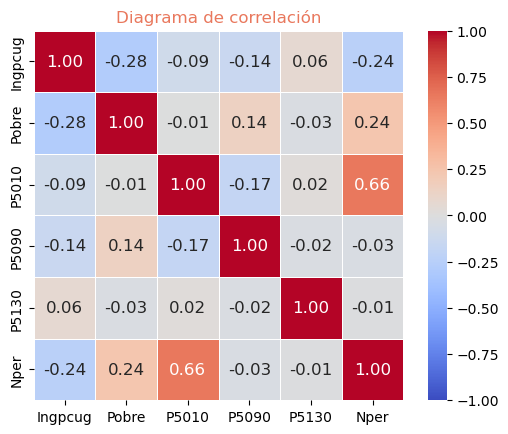

In [10]:
#Heatmap de la base hogares con las variables interesantes

columnas = ['Ingpcug', 'Pobre', 'P5010', 'P5090', 'P5130', 'Nper']
corr = train_hogares[columnas].corr()

# Crear el mapa de calor con escala fija de -1 a 1
sns.heatmap(
    corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm', annot=True, fmt='.2f',
    cbar=True, square=True, annot_kws={'size': 12}, linewidth=.5,
    vmin=-1, vmax=1  # Configurar la escala fija de colores
)

# Personalizar el gráfico
plt.title('Diagrama de correlación', color='#E9785D')
plt.show()

**ACLARO: ESTO LE DA ESTRUCTURA, NO ES QUE SEA EXCLUYENTE LAS VARIABLES QUE PUSE**

A continuación, transformamos ciertas variables de la base de individuos para luego utilizarlas junto con los hogares. Estas variables se intuye que pueden ser buenas predictoras. Las mismas son:

P6020: sexo: creamos _prop_sex_ proporción de masculinos en la casa puede ser bueno para predecir. 

p6210: creamos _max_level_edu_. creamos una variable que sea el máximo nivel educativo alcanzado por los integrantes del hogar

p6430: creamos _ocup_jefe_. posición ocupacional de la 1ra actividad. nos podemos quedar con lo que hace el jefe de hogar.

p6920: creamos _cant_blanco_. Esta variable nos dice si está cotizando a un fondo de pensiones. crear una variable que nos diga la cantidad de empleados formales que tiene el hogar. La variable p6920 toma 3 valores: 1: si, 2: no, 3: ya es pensionado. Solo vamos a tomar 1 si está cotizando y 0 en cualquier otro caso.

Oc: cant_ocup. sumamos todos los ocupados que tiene la casa.


In [13]:
#Cambiamos el valor de mujer de 2 a 0 para poder hacer cálculos luego

train_personas['P6020'] = train_personas['P6020'].replace(2, 0)

In [18]:
#Calculamos la proporción de hombres en el hogar:

# Contar cuántos hombres hay en cada hogar (P6020 == 1)
hombres_por_hogar = train_personas[train_personas['P6020'] == 1].groupby('id')['P6020'].count()

# Contar el total de integrantes por hogar
total_por_hogar = train_personas.groupby('id')['P6020'].count()

# Calcular la proporción de hombres en cada hogar
train_personas['prop_sex'] = train_personas['id'].map(hombres_por_hogar) / train_personas['id'].map(total_por_hogar)


In [16]:
#Creamos una variable que nos diga el máximo nivel educativo de cada integrante del hogar

# Filtrar los valores válidos de 'P6210' (1 a 6, excluyendo 9)
train_personas_filtrado = train_personas[train_personas['P6210'] != 9]

# Agrupar por el identificador del hogar (asumí que hay una columna 'hogar_id' que identifica a cada hogar)
# Luego, calcular el máximo nivel educativo alcanzado en cada hogar
train_personas['mal_level_edu'] = train_personas_filtrado.groupby('id')['P6210'].transform('max')

# Si hay hogares con valores 'P6210' == 9 (sin datos válidos), asignamos el valor correspondiente para esos hogares
train_personas['mal_level_edu'] = train_personas.groupby('id')['mal_level_edu'].transform('max')

# Mostrar las primeras filas para verificar
print(train_personas[['id', 'P6210', 'mal_level_edu']].head())


                         id  P6210  mal_level_edu
0  8d0193e328305a042001a35f    3.0            5.0
1  8d0193e328305a042001a35f    2.0            5.0
2  8d0193e328305a042001a35f    5.0            5.0
3  8d0193e328305a042001a35f    2.0            5.0
4  8d0193e328305a042001a35f    4.0            5.0


In [20]:
#Creamos la variable "ocup_jefe" que toma el valor de la ocupación principal del jefe de hogar

# Filtrar la fila correspondiente al jefe del hogar (P6050 == 1)
jefe_hogar = train_personas[train_personas['P6050'] == 1]

# Crear un diccionario con la relación 'id' del hogar y la posición ocupacional del jefe (P6430)
jefe_ocupacion = jefe_hogar.set_index('id')['P6430'].to_dict()

# Asignar la posición ocupacional del jefe a la nueva variable 'ocup_jefe'
train_personas['ocup_jefe'] = train_personas['id'].map(jefe_ocupacion)


In [24]:
#Contamos la cantidad de personas trabajando en blanco que tiene el hogar

# Crear una variable que sea 1 si la persona está en blanco (P6870 == 1) y 0 en cualquier otro caso
train_personas['blanco'] = (train_personas['P6870'] == 1).astype(int)

# Agrupar por 'id' y sumar la cantidad de personas en blanco en cada hogar
cant_blanco_por_hogar = train_personas.groupby('id')['blanco'].sum()

# Asignar la suma de personas en blanco a la nueva variable 'cant_blanco' en el DataFrame original
train_personas['cant_blanco'] = train_personas['id'].map(cant_blanco_por_hogar)


In [28]:
# Crear una variable que sea 1 si la persona está ocupada (Oc == 1) y 0 en cualquier otro caso
train_personas['ocupada'] = (train_personas['Oc'] == 1).astype(int)

# Agrupar por 'id' y sumar la cantidad de personas ocupadas en cada hogar
cant_ocupada_por_hogar = train_personas.groupby('id')['ocupada'].sum()

# Asignar la suma de personas ocupadas a la nueva variable 'cant_ocupada' en el DataFrame original
train_personas['cant_ocup'] = train_personas['id'].map(cant_ocupada_por_hogar)


In [30]:
train_personas['cant_ocup'].value_counts()

cant_ocup
1     189092
2     188529
3      75167
0      46864
4      28720
5       9772
6       3211
7       1026
8        469
9        191
10        33
14        22
11        13
Name: count, dtype: int64

In [34]:
#Agregamos a la base de hogares las variables creadas en la base de personas

# Agrupar las variables creadas por 'id' en la base 'train_personas'
df_personas_agg = train_personas.groupby('id')[['mal_level_edu', 'prop_sex', 'ocup_jefe', 'cant_blanco', 'cant_ocup']].mean()

# Unir la base 'train_hogares' con las variables agregadas de 'train_personas'
train_hogares = train_hogares.merge(df_personas_agg, on='id', how='left')


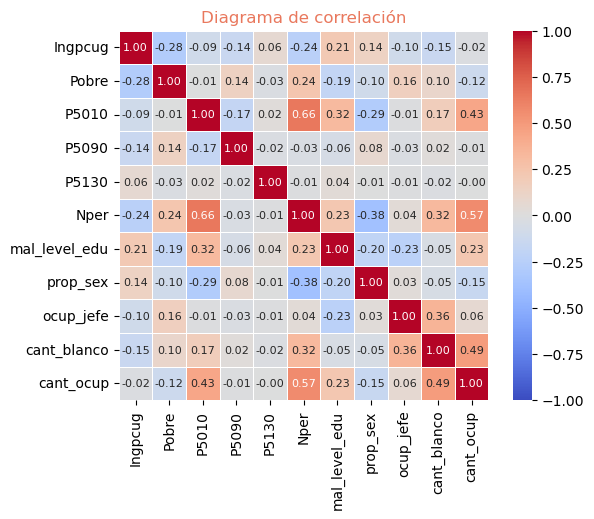

In [37]:
#Ahora exponemos la matriz de correlacion con todas las variables. 

columnas = ['Ingpcug', 'Pobre', 'P5010', 'P5090', 'P5130', 'Nper', 'mal_level_edu', 'prop_sex', 'ocup_jefe', 'cant_blanco', 'cant_ocup']
corr = train_hogares[columnas].corr()

# Crear el mapa de calor con escala fija de -1 a 1
sns.heatmap(
    corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm', annot=True, fmt='.2f',
    cbar=True, square=True, annot_kws={'size': 8}, linewidth=.5,
    vmin=-1, vmax=1  # Configurar la escala fija de colores
)

# Personalizar el gráfico
plt.title('Diagrama de correlación', color='#E9785D')
plt.show()